# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**

airports_nearest — расстояние до ближайшего аэропорта в метрах

balcony — число балконов

ceiling_height — высота потолков

cityCenters_nearest — расстояние до центра города

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах

total_images — число фотографий квартиры в объявлении

## Шаг 1. Откройте файл с данными и изучите общую информацию. <a id='section1'></a>

Получим данные по таблице.

In [352]:
import pandas as pd
import matplotlib.pyplot as plt

In [353]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Далеко не все строки заполнены полностью, так как всего их 23699, а ненуленых значений во многих столбцах меньше этого значения. Также не все типы данных нас устраивают, их нужно будет изменить в дальнейшем. Выведим несколько первых строк таблицы, чтобы ознакомиться с данными.

In [355]:
data.head(12)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим описание данных для всех столбцов.

In [356]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Из полученных данных видно, что в них содержатся 23699 строк и 22 столбца, из которых 2 булеевого типа bool (studio, open_plan), 3 целочисленного типа int64 (total_images, rooms, floor), 3 строкового типа object (first_day_exposition, is_apartment, locality_name) и оставшиеся 14 вещественного типа float64. Не все типы данных нас устраивают, поэтому нужно будет изменить типы так, чтобы с ними было удобно работать, а именно:

1) Конвертировать в целочисленный тип int64 такие столбцы, как last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition;

2) Конвертировать в булев тип bool столбец is_apartment;

3) Конвертировать в тип даты и времени datetime столбец first_day_exposition.

Также в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition обнаружены пропуски и необходимо разобраться, что с ними делать для каждого столбца в отдельности: удалять, заполнять или оставлять без изменений.

## Шаг 2. Предобработка данных <a id='section2'></a>

### Обработка пропусков <a id='section3'></a>

Первым делом разберемся с пропусками. Рассмотрим столбец floors_total, который показывает количество этажей в доме. Подсчитаем количество пропусков и рассчитаем конверсию, чтобы понять как удаление таких значений повлияет на финальныые выводы.

In [357]:
print('Количество пропусков в столбце floors_total:', len(data.query('floors_total == "NaN"')))
print('Доля пропусков в столбце floors_total: {:.2%}'.format(len(data.query('floors_total == "NaN"')) / len(data)))

Количество пропусков в столбце floors_total: 86
Доля пропусков в столбце floors_total: 0.36%


Удаление строк с такими пропусками почти никак не повлияет на выводы.

In [358]:
print('Колличество строк в таблице:', len(data))
data.dropna(subset=['floors_total'], inplace=True)
print('Количество пропусков в столбце floors_total:', len(data.query('floors_total == "NaN"')))
print('Колличество строк в таблице без пропусков:', len(data))

Колличество строк в таблице: 23699
Количество пропусков в столбце floors_total: 0
Колличество строк в таблице без пропусков: 23613


В столбце ceiling_height присутствуют только 14504 значений из 23699 возможных. Так много значений может быть пропущенно из-за того, что люди, вносящие данные, просто не обладали информацией о высоте потолков или не посчитали нужным ее внести. Посмотрим на описание данных, чтобы понять с каким разбросом значений имеем дело и выведем диаграмму размаха.

In [359]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0.5, 1.0, 'Диаграмма размаха для высоты потолков')

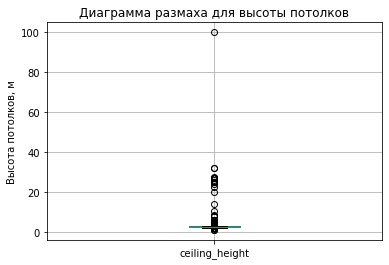

In [360]:
data.boxplot('ceiling_height').set_ylabel('Высота потолков, м')
plt.title('Диаграмма размаха для высоты потолков')

Из описания следует, что медиана по высоте потолка равна 2,65 метрам, но так же в данных присутствуют явные артефакты с высотой потолков с многоэтажный дом. Диаграмма размаха, представленная выше, показывает, в данных есть много квартир с неправдоподобно высокими потолками, но нормальных значений на ней не видно, поэтому выведем диаграмму размаха в меньшем масштабе, а также гистограмму распределения высот.

Text(0.5, 1.0, 'Диаграмма размаха для высоты потолков')

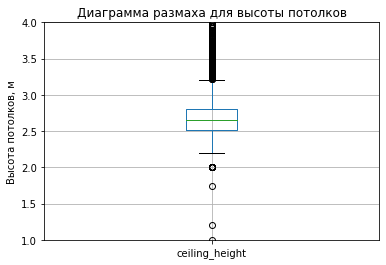

In [361]:
data.boxplot('ceiling_height').set_ylabel('Высота потолков, м')
plt.ylim([1, 4])
plt.title('Диаграмма размаха для высоты потолков')

Text(0.5, 1.0, 'Гистограмма для высоты потолков')

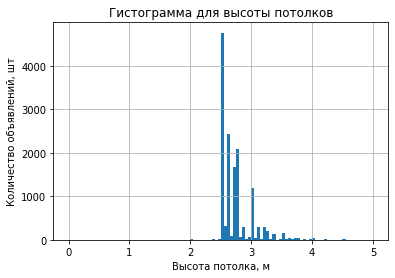

In [362]:
data.hist('ceiling_height', bins=100, range=(0, 5))
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма для высоты потолков')

Так как исследование связано с продажей квартир, то потолки высотой больше 4 метров и меньше 2 метров маловероятны, поэтому в будущем можно будет отсечь эти данные. Пропущенные значения можно заполнить медианой.

In [363]:
import numpy as np
ceiling_height_median = data['ceiling_height'].median()
print('Медианное значение высоты потолка:', ceiling_height_median)

data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
print('Количество пропусков в столбце ceiling_height:', len(data.query('ceiling_height == "NaN"')))
data.head()

Медианное значение высоты потолка: 2.65
Количество пропусков в столбце ceiling_height: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбце с жилой площадью living_area присутствуют пропуски. Проверим зависит ли площадь от числа комнат, если да, то заполним пропуски мединной площадью для для каждого номера комнат. После разберемся присутствуют ли в столбцах rooms и living_area артефакты.

In [364]:
data['living_area'].describe()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Из описания столбца living_area видно, что самая маленькая кравтира имеет площадь 2 квадратных метра, что кажется не правдоподобным. Примем допущение, что самая маленькая квартира будет площадью 10 квадратных метров и в дальнейшем будем брать срез по данным с учетом этой информации.

Text(0.5, 1.0, 'Гистограмма жилой площади')

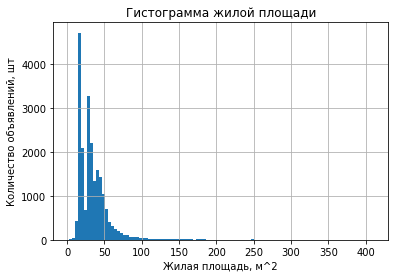

In [365]:
data.hist('living_area', bins=100)
plt.xlabel('Жилая площадь, м^2')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма жилой площади')

Гистограмма напоминает распределение Пуассона, поэтому можно считать имеющиеся данные в этом столбце достоверными.

Найдем артефакты в стобце числа комтан.

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0.5, 1.0, 'Гистограмма количества комнат')

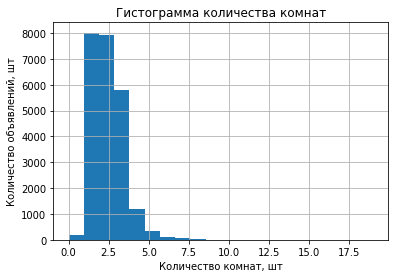

In [366]:
print(data['rooms'].describe())
data.hist('rooms', bins=20)
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма количества комнат')

Вряд ли квартира с 0 комнат может существовать, это ошибка в заполнении, но так как судя по гистограмме таких комнат мало, то можно просто не учитывать их для решения поставленных задач.

Определим корреляцию числа комнат и жилой площади.

In [367]:
print(data['rooms'].corr(data['living_area']))

0.8460058343889175


Полученное значение 0.846 говорит о том, что число комнат напрямую зависит от площади квартиры, поэтому можно заполнить пропуски в living_area, найдя медиану для каждого отдельного числа комнат.

In [368]:
living_area_by_rooms = data.groupby('rooms')['living_area'].median()
living_area_by_rooms

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.500
5      91.785
6     124.400
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

Можно заметить, что медиана, начиная с 10 комнаты не стабильная, чтобы избжать ошибок в расчетах лучше избавиться от подобных строк как от артефактов.

Заполним пропуски в living_area.

In [370]:
def living_area_fill_na(row):
    room = row['rooms']
    if row['living_area'] != row['living_area']:
        row['living_area'] = living_area_by_rooms[room]
    return row

data = data.apply(living_area_fill_na, axis=1)
print('Количество пропусков в столбце living_area:', len(data.query('living_area == "NaN"')))
data.head()

Количество пропусков в столбце living_area: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around300

В столбце is_apartment, который сообщает является ли квартира аппартаментами, много пропусков. Это может быть связано с тем, что  эту графу заполняют только если квартира на самом деле аппартаменты. Поэтому заполним все пропуски значением False.

In [372]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23563
True        50
Name: is_apartment, dtype: int64

Для выполнения заданий необхидмо заполнить пропуски в столбце с площадью кухни kitchen_area. Пропуски могли появиться из-за того, что заполняющий не знал какое значение вписать, либо из-за невнимательности. Определим связана ли площадь кухни с площадью нежилой части квартиры.

In [373]:
print((data['total_area'] - data['living_area']).corr(data['kitchen_area']))

0.7153857406547645


Так как прослеживается явная связь определим медиану отношения площадь кухни к нежилой площади квартиры. Это будет коэффициент, на который будет умножаться нажилая площадь, для того, чтобы заполнить пропуски.

In [374]:
med = (data['kitchen_area'] / (data['total_area'] - data['living_area'])).median()
med

0.4117647058823529

Заполним пропуски в kitchen_area.

In [375]:
def kitchen_area_fill_na(row):
    if row['kitchen_area'] != row['kitchen_area']:
        row['kitchen_area'] = round((row['total_area'] - row['living_area']) * med, 2)
    return row

data = data.apply(kitchen_area_fill_na, axis=1)
print('Количество пропусков в столбце kitchen_area', len(data.query('kitchen_area == "NaN"')))

Количество пропусков в столбце kitchen_area 0


Заполним пропуски в столбце с числом балконов balcony. Они могли получился из-за того, что люди, заполнявшие объявление решили, что если балконов нет, то можно пропустить эту графу, так как и без значения 0 все будет понятно. Вместе всех пропущеных значений запишем 0.

In [376]:
data['balcony'] = data['balcony'].fillna(0)
print('Количество пропусков в столбце balcony', len(data.query('balcony == "NaN"')))

Количество пропусков в столбце balcony 0


В столбце названий населенных пунктов locality_name присутствуют незначительное количество пропусков, к тому же названия могут содержать повторяющиеся значения, а именно одинаковые по смыслу "поселок" и "посёлок". Удалим пропуски и заменим "посёлок" на "поселок".

In [377]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [378]:
print('Количество уникальных значений:', len(data['locality_name'].unique()))

Количество уникальных значений: 365


In [379]:
data.dropna(subset=['locality_name'], inplace=True)

In [381]:
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
print('Количество уникальных значений:', len(data['locality_name'].unique()))

Количество уникальных значений: 330


In [382]:
def strip_low_reg(name):
    name = name.split()
    for word in name:
        if word.istitle():
            return word

data['locality_name'] = data['locality_name'].apply(strip_low_reg)
print('Количество уникальных значений:', len(data['locality_name'].unique()))

Количество уникальных значений: 297


В столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest значения получены автоматически и пропуски внутри этих столбцов говорят лишь о том, что поблизости нет того, за что отвечает каждый конкретный столбец. Так как значения указывают либо расстояние до аэропорты, центра, парка, пруда или число парков и прудов поблизости, то пропуски можно заполнить 0, потому что нулевые значения будут нести информацию о том, что одного из вышеуказанных объектов нет поблизости.

In [383]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
print('Количество пропусков в столбце cityCenters_nearest:', len(data.query('cityCenters_nearest == "NaN"')))
data['airports_nearest'] = data['airports_nearest'].fillna(0)
print('Количество пропусков в столбце airports_nearest:', len(data.query('airports_nearest == "NaN"')))
data['parks_around3000'] = data['parks_around3000'].fillna(0)
print('Количество пропусков в столбце parks_around3000:', len(data.query('parks_around3000 == "NaN"')))
data['parks_nearest'] = data['parks_nearest'].fillna(0)
print('Количество пропусков в столбце parks_nearest:', len(data.query('parks_nearest == "NaN"')))
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print('Количество пропусков в столбце ponds_around3000:', len(data.query('ponds_around3000 == "NaN"')))
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
print('Количество пропусков в столбце ponds_nearest:', len(data.query('ponds_nearest == "NaN"')))

Количество пропусков в столбце cityCenters_nearest: 0
Количество пропусков в столбце airports_nearest: 0
Количество пропусков в столбце parks_around3000: 0
Количество пропусков в столбце parks_nearest: 0
Количество пропусков в столбце ponds_around3000: 0
Количество пропусков в столбце ponds_nearest: 0


Text(0.5, 1.0, 'Гистограмма удаленности от центра')

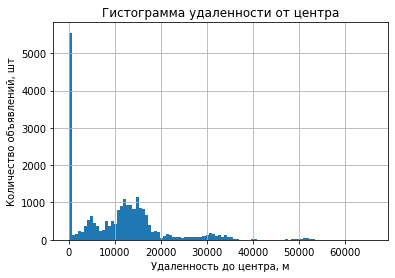

In [384]:
data.hist('cityCenters_nearest', bins=100)
plt.xlabel('Удаленность до центра, м')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма удаленности от центра')

Теперь на гистограмме ярко выраженно аномальное значение "0". При выполнении заданий эти значения не войдут в срез.

Пропуски в столбце о сроке публикации объявления от размещения до снятия days_exposition заполняться не будут, так как раз объявление все еще не закрыто, то видимо квартира еще не была продана. Тоже заполним их нулями как маркером отсутствия данных и при выполнении заданий не будем включать их в срез.

In [385]:
data['days_exposition'] = data['days_exposition'].fillna(0)
print('Количество пропусков в столбце days_exposition:', len(data.query('days_exposition == "NaN"')))

Количество пропусков в столбце days_exposition: 0


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
cityCenters_nearest     23565 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           23565 non-null float64
ponds_around300

### Вывод

При обработке пропусков были удалены строки с пустыми ячейками столбца floors_total. 

В столбеце ceiling_height они были заполнены медианой, так как, удалив эти строки, мы бы выкинули половину всех данных. 

В столбце rooms пропуски были удалены из-за их незначительного количества.

living_area была заполнена медианными значениями площади для квартир с определенным числом комнат.

is_apartment заполнена значениями False, так как было принято допущение, что клиент заполняет это поле, только если квартира - это на самом деле аппартаменты, а в ином случаем, это поле в большинстве случаев остается проигнорированным.

Столбец kitchen_area коррелировал с площадью нежилой части квартиры, поэтому было найдено медианное отношение площади кухни и нежилой части и далее пропуски заполнялись произведением площади нежилой части квартиры и этого медианного отношения.

balcony заполнялся нулями, с тем же принятым допущением, что и в is_apartment.

Во всех оставшихся столбцах пропуски были также заполнены нулями, чтобы в дальнейшем можно было изменить тип столбцов, но при работе с ними продется брать срез данных без строк где в ячейках, относяхщихся к ним, есть нули.

### Замена типа данных <a id='section4'></a>

Как было сказано в выводе Шага 1 необходимо:

1) Конвертировать в целочисленный тип такие столбцы, как last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, так как либо считать в целых числах будет удобнее (airports_nearest, cityCenters_nearest и тд) или дробные значения не логичны (floors_total, balcony и тд);

2) Конвертировать в булев тип bool столбец is_apartment (это было сделано в Шаге 2);

3) Конвертировать в тип даты и времени datetime столбец first_day_exposition.

In [387]:
mem = data.__sizeof__()
print('Используется памяти: {} байт'.format(mem))

Используется памяти: 8371400 байт


In [388]:
data['total_images'] = data['total_images'].astype('uint8')
data['rooms'] = data['rooms'].astype('uint8')
data['ceiling_height'] = data['ceiling_height'].astype('float16')
data['floor'] = data['floor'].astype('uint8')

data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('uint8')
data['balcony'] = data['balcony'].astype('uint8')
data['airports_nearest'] = data['airports_nearest'].astype('int32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int32')
data['parks_around3000'] = data['parks_around3000'].astype('uint8')
data['parks_nearest'] = data['parks_nearest'].astype('uint16')
data['ponds_around3000'] = data['ponds_around3000'].astype('uint8')
data['ponds_nearest'] = data['ponds_nearest'].astype('uint16')
data['days_exposition'] = data['days_exposition'].astype('uint16')
data.dtypes

total_images              uint8
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     uint8
ceiling_height          float16
floors_total              uint8
living_area             float64
floor                     uint8
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   uint8
locality_name            object
airports_nearest          int32
cityCenters_nearest       int32
parks_around3000          uint8
parks_nearest            uint16
ponds_around3000          uint8
ponds_nearest            uint16
days_exposition          uint16
dtype: object

In [389]:
print('Используется памяти: {} байт'.format(data.__sizeof__()))
print('Памяти сэкономлено: {:.1%}'.format(1 - data.__sizeof__() / mem))

Используется памяти: 6462635 байт
Памяти сэкономлено: 22.8%


In [390]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.699219,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.650391,11,18.6,1,False,...,11.00,2,Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.650391,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.650391,14,45.0,9,False,...,46.94,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.029297,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121


Осталось иправить тип даты публикации объявления. Уберем из таблицы время, оставив только дату.

In [391]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.699219,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350000,40.4,2018-12-04,1,2.650391,11,18.6,1,False,...,11.00,2,Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.0,2015-08-20,2,2.650391,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.650391,14,45.0,9,False,...,46.94,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.029297,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121


### Вывод

Были выполнены следующие именения:

1) Конвертированы в целочисленный тип int64 такие столбцы, как last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

2) Конвертированы в булев тип bool столбец is_apartment (это было сделано в Шаге 2);

3) Конвертированы в тип даты и времени datetime столбец first_day_exposition.

## Шаг 3. Посчитайте и добавьте в таблицу <a id='section5'></a>

Определим и добавим в таблицу цену квадратного метра разделив цену на момент снятия с публикации на общую площадь квартиры.

In [392]:
data['meter_price'] = round(data['last_price'] / data['total_area'], 2)
data[['last_price', 'total_area', 'meter_price']].head(8)

,last_price,total_area,meter_price
0,13000000,108.0,120370.37
1,3350000,40.4,82920.79
2,5196000,56.0,92785.71
3,64900000,159.0,408176.10
4,10000000,100.0,100000.00
5,2890000,30.4,95065.79
6,3700000,37.3,99195.71
7,7915000,71.6,110544.69


Определим и добавим в таблицу классификацию по этажу, на котором находится квартира, с категориями "первый", "последний", "другой".

In [393]:
def floor_to_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_to_category, axis=1)
data[['floors_total', 'floor', 'floor_category']].head(15)

,floors_total,floor,floor_category
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,9,другой
4,14,13,другой
5,12,5,другой
6,26,6,другой
7,24,22,другой
8,27,26,другой
9,9,7,другой


Определим и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [394]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)
data[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio']]

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio
0,108.00,51.0,25.00,0.47,0.23
1,40.40,18.6,11.00,0.46,0.27
2,56.00,34.3,8.30,0.61,0.15
3,159.00,45.0,46.94,0.28,0.30
4,100.00,32.0,41.00,0.32,0.41
...,...,...,...,...,...
23694,133.81,73.3,13.83,0.55,0.10
23695,59.00,38.0,8.50,0.64,0.14
23696,56.70,29.7,11.12,0.52,0.20
23697,76.75,30.5,23.30,0.40,0.30


count    23565.000000
mean         0.185661
std          0.072470
min         -0.210000
25%          0.130000
50%          0.170000
75%          0.230000
max          0.790000
Name: kitchen_area_ratio, dtype: float64


Text(0.5, 1.0, 'Диаграмма размаха доли площади кухни в общей площади')

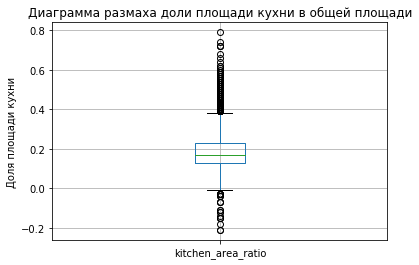

In [395]:
print(data['kitchen_area_ratio'].describe())
data.boxplot('kitchen_area_ratio')
plt.ylabel('Доля площади кухни')
plt.title('Диаграмма размаха доли площади кухни в общей площади')

В соотношении площадей кухни и общей присутствуют отрицательные, близкие к нулю и довольно большие значения. Это ошибка при исправлении данных, а именно для этих строк медиана жилой площади по числу комнат не сработала как надо и мы получили, то что получили. Проверим влияние на выводы данных, в которых не будет соотнишений меньше 0.1 и больше 0.39.

In [396]:
print('Процент данных оставшихся в срезе: {:.2%}'.format(len(data.query('0 < kitchen_area_ratio <=0.39')) / len(data)))

Процент данных оставшихся в срезе: 98.54%


Влияние не велико, поэтому оставим все как есть. Проделаем все то же самое для соотношения жилой и общей площадей.

count    23565.000000
mean         0.564007
std          0.110884
min          0.020000
25%          0.490000
50%          0.570000
75%          0.640000
max          1.510000
Name: living_area_ratio, dtype: float64


Text(0.5, 1.0, 'Диаграмма размаха доли жилой кухни в общей площади')

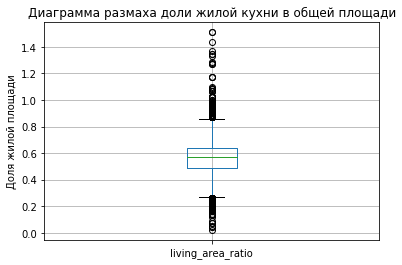

In [397]:
print(data['living_area_ratio'].describe())
data.boxplot('living_area_ratio')
plt.ylabel('Доля жилой площади')
plt.title('Диаграмма размаха доли жилой кухни в общей площади')

Значения ниже 0.3 и выше 0.8 аномальны.

In [398]:
print('Процент данных оставшихся в срезе: {:.2%}'.format(len(data.query('0.3 < living_area_ratio <=0.83')) / len(data)))

Процент данных оставшихся в срезе: 98.04%


In [399]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.699219,16,51.0,8,False,...,16028,1,482,2,755,0,120370.37,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.650391,11,18.6,1,False,...,18603,0,0,0,0,81,82920.79,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.650391,5,34.3,4,False,...,13933,1,90,2,574,558,92785.71,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.650391,14,45.0,9,False,...,6800,2,84,3,234,424,408176.10,другой,0.28,0.30
4,2,10000000,100.0,2018-06-19,2,3.029297,14,32.0,13,False,...,8098,2,112,1,48,121,100000.00,другой,0.32,0.41


### Вывод

В таблицу были добавлены такие столбцы как:

1) meter_price - стоимость квадратного метра;

2) floor_category - категории для квартир по этажу размещения (первый, последний, другой);

3) living_area_ratio - отношение жилой площади к общей;

4) kitchen_area_ratio - отношение площади кухни к общей.

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a id='section6'></a>

### Изучим параметры (площадь, цена, число комнат, высота потолков) и построим гистограммы. <a id='section7'></a>

In [400]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.699219,16,51.0,8,False,...,16028,1,482,2,755,0,120370.37,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.650391,11,18.6,1,False,...,18603,0,0,0,0,81,82920.79,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.650391,5,34.3,4,False,...,13933,1,90,2,574,558,92785.71,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.650391,14,45.0,9,False,...,6800,2,84,3,234,424,408176.10,другой,0.28,0.30
4,2,10000000,100.0,2018-06-19,2,3.029297,14,32.0,13,False,...,8098,2,112,1,48,121,100000.00,другой,0.32,0.41


Начнем с общей площади.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


Text(0.5, 1.0, 'Гистограмма общей площади')

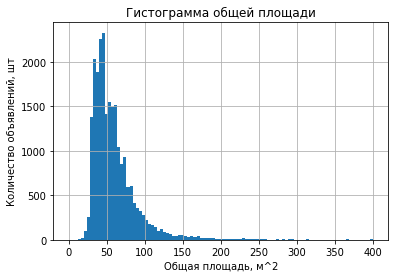

In [401]:
print(data['total_area'].describe())
data.hist('total_area', bins=100, range=(0, 400))
plt.xlabel('Общая площадь, м^2')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма общей площади')

Распределение значений общей площади напоминает распределение Пуассона, по этому можно судить, что представленные данные корректны. Площади разнятся от 12 до 900 квадратных метров, со средним значением 60 и медианой - 52. Это говорит о том, что квартир с малой площадью больше, чем с большой. Гистограмма это подтверждает. Количество объявлений с площадью квартиры от 200 метров и до 20 стремится к нулю, поэтому можно отбросить их как редкие и выбивающиеся значения.

Text(0.5, 1.0, 'Гистограмма общей площади')

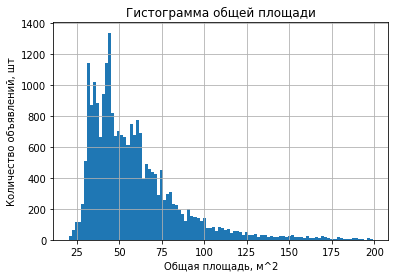

In [402]:
good_data = data.query('20 < total_area < 200')
good_data.hist('total_area', bins=100)
plt.xlabel('Общая площадь, м^2')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма общей площади')

Изучим цену квариры.

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Text(0.5, 1.0, 'Гистограмма стоимости квартиры')

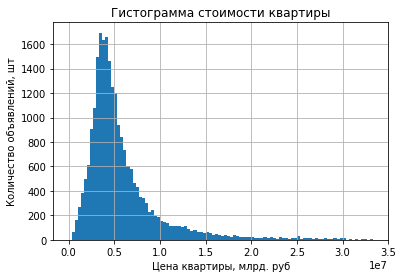

In [403]:
print(data['last_price'].describe())
data.hist('last_price', bins=100, range=(0, 100000000/3))
plt.xlabel('Цена квартиры, млрд. руб')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма стоимости квартиры')

Text(0.5, 1.0, 'Диаграмма размаха стоимости квартиры')

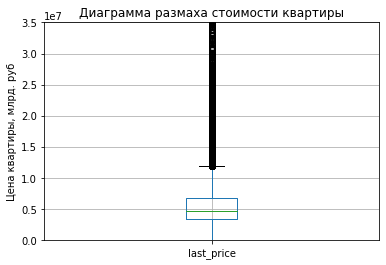

In [404]:
data.boxplot('last_price').set_ylim([0, 35000000])
plt.ylabel('Цена квартиры, млрд. руб')
plt.title('Диаграмма размаха стоимости квартиры')

Распределение значений цены квартиры представляет из себя распределение Пуассона, по этому можно судить, что представленные данные корректны. Цены разнятся от 12000 до 760 миллионов рублей, со средним значением 6.5 млн и медианой - 4.6 млн рублей.  Количество объявлений с ценой квартиры от 15 млн рублей стремится к нулю, поэтому можно отбросить их как редкие и выбивающиеся значения. По диаграмме размаха видно, что можно было бы отбросить значения от 13 млн, но это слишком толстый хвост гистограммы.

Text(0.5, 1.0, 'Гистограмма стоимости квартиры')

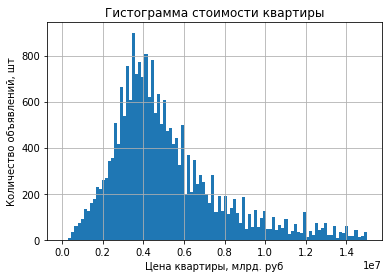

In [405]:
good_data = good_data.query('last_price < 15000000')
good_data.hist('last_price', bins=100)
plt.xlabel('Цена квартиры, млрд. руб')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма стоимости квартиры')

Изучим число комнат.

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0.5, 1.0, 'Гистограмма количества комнат')

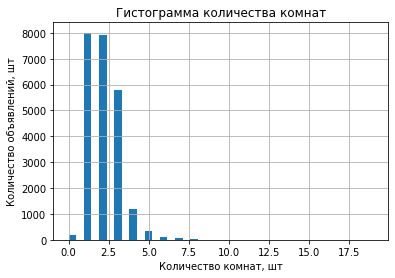

In [406]:
print(data['rooms'].describe())
data.hist('rooms', bins=40)
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма количества комнат')

Text(0.5, 1.0, 'Диаграмма размаха количества комнат')

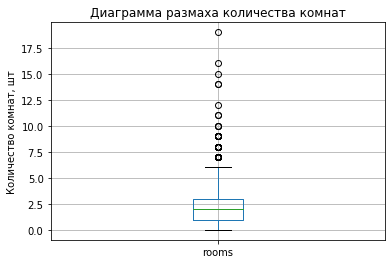

In [407]:
data.boxplot('rooms')
plt.ylabel('Количество комнат, шт')
plt.title('Диаграмма размаха количества комнат')

Распределение значений числа комнат представляет из себя распределение Пуассона, по этому можно судить, что представленные данные корректны. Число комнат разнится от 0 до 19 штук, со средним значением примерно 2 и медианой - 2. Количество объявлений с числом комнат от 6 штук стремится к нулю, поэтому можно отбросить их как редкие и выбивающиеся значения. Также значение 0 не имеет смысла, ведь в квартире должна быть как минимум 1 комната, так что их тоже отбросим.

Text(0.5, 1.0, 'Гистограмма количества комнат')

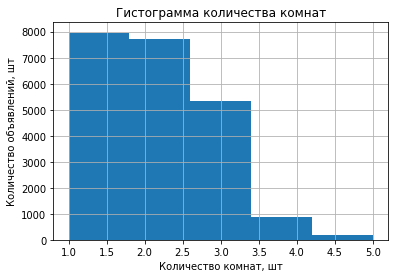

In [408]:
good_data = good_data.query('0 < rooms < 6')
good_data.hist('rooms', bins=5)
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма количества комнат')

Изучим высоту потолков.

count    23565.000000
mean         2.724609
std          0.990723
min          1.000000
25%          2.599609
50%          2.650391
75%          2.699219
max        100.000000
Name: ceiling_height, dtype: float64


Text(0.5, 1.0, 'Гистограмма для высоты потолков')

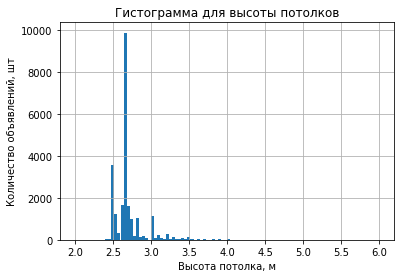

In [409]:
print(data['ceiling_height'].describe())
data.hist('ceiling_height', bins=100, range=(2, 6))
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма для высоты потолков')

Text(0.5, 1.0, 'Диаграмма размаха высот потолков')

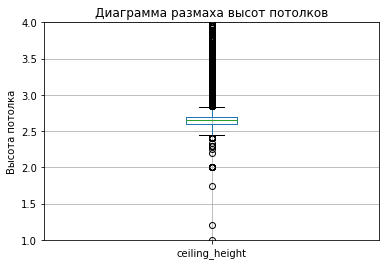

In [410]:
data.boxplot('ceiling_height').set_ylim([1, 4])
plt.ylabel('Высота потолка')
plt.title('Диаграмма размаха высот потолков')

Распределение значений высоты потолков отдаленно напоминает распределение Пуассона из-за того, что пропуски в этом столбце составляли около половины всех значений и были заполнены медианой, то из-за этого и получился такой всплеск в районе 2,65 м. Также всплески наблюдаются в районе 2,5 и 3 метров так как это "красивые" и с такими размерами удобнее производить строительные работы. Высоты разнится от 1 до 100 метров, со средним значением 2.7 и медианой - 2.65. Количество объявлений высотой поотолков от 3.5 и до 2.4 метров стремится к нулю, поэтому можно отбросить их как редкие и выбивающиеся значения.

Text(0.5, 1.0, 'Гистограмма для высоты потолков')

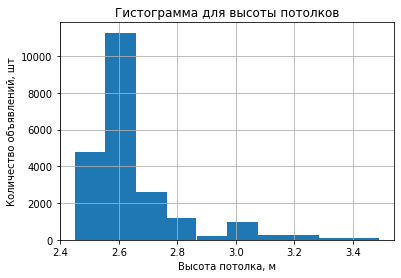

In [411]:
good_data = good_data.query('2.4 < ceiling_height < 3.5')
good_data.hist('ceiling_height', bins=10)
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма для высоты потолков')

Определим какую часть данных мы поторяли в ходе отбрасывания не удовлетворительных значений.

In [412]:
print('Отброшено {:.2%} данных'.format(1 - len(good_data) / len(data)))

Отброшено 7.72% данных


### Вывод

Были изучены такие параметры, как площадь, цена, число комнат и высота потолков и построены гистограммы. Распреления значений на этих гистограммах похожи на Пуассоновские, значит данные собраны корректно. Был создан срез данных good_data в который не вошли редкие и выбивающиеся значения.

### Изучение времени продажи квартиры <a id='section8'></a>

Так как невозможно продать квартиру за 0 дней, а выше было сказано, что значение "0" говорит о том, что данных о времени продажи квартиры нет, то избавимся от лишних значений, записав срез в переменную good_days_data.

In [413]:
good_days_data = good_data.query('days_exposition > 0')

count    19028.000000
mean       176.108367
std        214.771855
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0.5, 1.0, 'Гистограмма для сроков размещения')

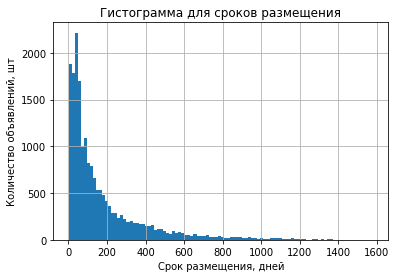

In [414]:
print(good_days_data['days_exposition'].describe())
good_days_data.hist('days_exposition', bins=100)
plt.xlabel('Срок размещения, дней')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма для сроков размещения')

Text(0.5, 1.0, 'Диаграмма размаха для сроков размещения')

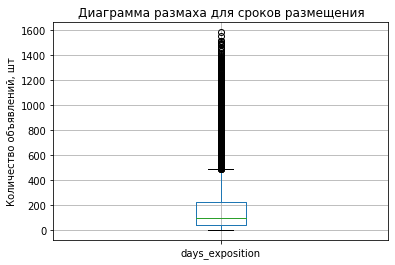

In [415]:
good_days_data.boxplot('days_exposition')
plt.ylabel('Количество объявлений, шт')
plt.title('Диаграмма размаха для сроков размещения')

Посчитаем среднее и медиану.

In [416]:
print('Среднее время продажи квартиры:', round(good_days_data['days_exposition'].mean(), 1))
print('Медианное время продажи квартиры:', good_days_data['days_exposition'].median())

Среднее время продажи квартиры: 176.1
Медианное время продажи квартиры: 93.0


Исходя из полученной информации половина всех квартир продается за 93 дня, но в среднем продажа квартиры занимает 176 дней. Это говорит о том, что вторая половина квартир продается гораздо дольше, чем за 93 дня. Из описания можно считать, что долгой продажа считается от 223 дней и аномально долгой от 418 дней (3й квартиль + 1,5 межквартильных расстояния). Необычно быстрой продажу можно считать, если квартира продалась за 44 дня или меньше.

Уберем аномальные значения по диаграмме размаха, а именно объявления со сроком 418 дней и выше.

Text(0.5, 1.0, 'Гистограмма для сроков размещения')

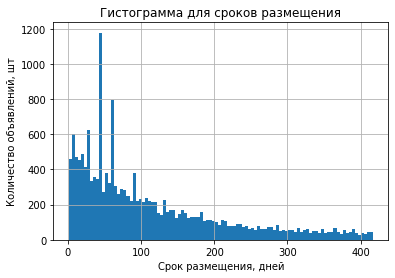

In [417]:
good_days_data.query('days_exposition < 418').hist('days_exposition', bins=100)
plt.xlabel('Срок размещения, дней')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма для сроков размещения')

По гистограмме основанной на срезе данных можно заметить как минимум 2 точечных всплеска количества закрытых объявлений на скроке примерно посередине между 30 и 60 днями. Рассмотрим этот промежуток в большем масштабе.

Text(0.5, 1.0, 'Гистограмма для сроков размещения')

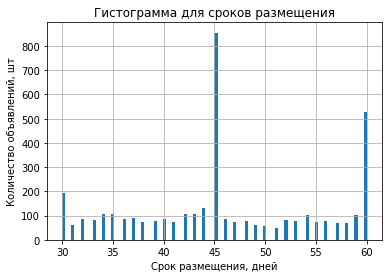

In [418]:
good_days_data.query('days_exposition < 418').hist('days_exposition', bins=100, range=(30, 60))
plt.xlabel('Срок размещения, дней')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма для сроков размещения')

Как можно заметить, всплески находятся на значениях 30, 45 и 60. Их наличие может говрить о том, что люди снимают объявления о продаже спустя срок кратный 15. Либо возможно алгоритмы сайта по продаже нежвижимости сами снимают объявление, если с клиентами не удается связаться.

### Вывод

Изучив время продажи квартиры, можно сделать вывод, что долгой продажа считается от 223 дней и аномально долгой от 418 дней, а необычно быстрой продажу можно считать, если квартира продалась за 44 дня или меньше. Полована всех квартир продается не более чем за 93 дня, а среднее время продажи 176 дней. Так же было обнаружено, что есть тенденция снимать объявления о продаже через срок кратный 15. Было сделано предположение, что это делают алгоритмы сайта по продаже квартир. 

### Изучение зависимости цены от площади, числа комнат, этажа, удаленности от центра и от даты размещения. <a id='section9'></a>

Проверим зависит ли цена квартиры от площади.

In [419]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.699219,16,51.0,8,False,...,16028,1,482,2,755,0,120370.37,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.650391,11,18.6,1,False,...,18603,0,0,0,0,81,82920.79,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.650391,5,34.3,4,False,...,13933,1,90,2,574,558,92785.71,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.650391,14,45.0,9,False,...,6800,2,84,3,234,424,408176.10,другой,0.28,0.30
4,2,10000000,100.0,2018-06-19,2,3.029297,14,32.0,13,False,...,8098,2,112,1,48,121,100000.00,другой,0.32,0.41


In [420]:
good_days_data['last_price'].corr(good_days_data['total_area'])

0.7433979856169927

Корреляция 0.74 говорит о наличии сильной связи, но не полной, так как на стоймость видимо влияют и другие факторы. Выведем диаграмму рассеяния. Пострим гистограмму рассеяния.

Text(0, 0.5, 'Цена квартиры, млрд. руб')

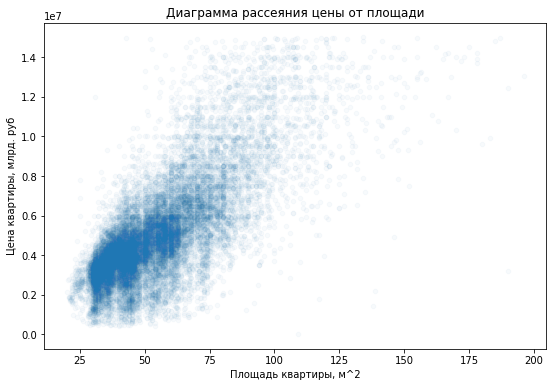

In [421]:
good_days_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, title='Диаграмма рассеяния цены от площади', figsize=(9, 6))
plt.xlabel('Площадь квартиры, м^2')
plt.ylabel('Цена квартиры, млрд. руб')

Наличие плотного пятна для площадей от 25 до 75 квадратных метров и для цены от 1 до 6 миллонов, говорит о наличии закономерности между парамметрами. Так же имеется "хвост кометы" направленных от "ядра" враво вверх, что могло бы говорить о закономерности между парамметрами, если бы в районе этого хвоста было бы больше данных. Построим гексограмму, чтобы убедиться в наличии связей.

Text(0, 0.5, 'Цена квартиры, млрд. руб')

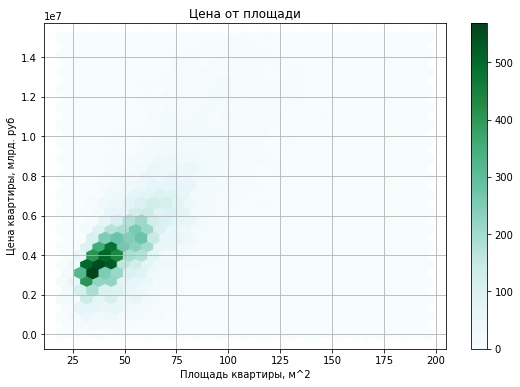

In [422]:
good_days_data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=30, figsize=(9, 6), sharex=False, grid=True)
plt.title('Цена от площади')
plt.xlabel('Площадь квартиры, м^2')
plt.ylabel('Цена квартиры, млрд. руб')

Гексограмма подтверждает наличие связи между площадью и ценой, в промежутке площади от 25 до 60 метров квадратных и цены от 2 до 6 миллионов. Про остальные значения строго говорить ничего нельзя, так как частота их появляния в пересечении конкретных площадей и цен редка. Возможно на результаты повлияло то, что расссмартиваются все населенные пункты разом, а не по отдельности, ведь цена на квартиру с одинаковым метражом различается в большом городе и деревне.

Проверим как связаны цена и количество комнат.

In [423]:
good_days_data['last_price'].corr(good_days_data['rooms'])

0.47756743618591313

Корреляция ниже 0.5 говорит о том, что связь хоть и имеется, но она слабая и необходимо выполнить какие-то действия с данными, для их группировки и обнаружения связи. Построим график по сводной таблице, собранной по ограниченному числу комнат с медианной ценой для каждого количества комнат.

Text(0.5, 1.0, 'График цены от числа комнат')

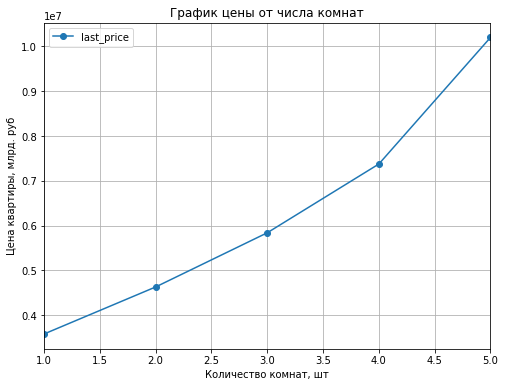

In [424]:
(good_days_data
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(8,6))
)
plt.xlabel('Количество комнат, шт')
plt.ylabel('Цена квартиры, млрд. руб')
plt.title('График цены от числа комнат')

График является почти прямой линией, что говорит о начилии связи между, ценой и числом комнат. Чем больше комнат, тем больше цена. Для 5 комнат значение немного выше, от продолжения прямой линии, так как для 5 комнат данных не так много, если их увеличить, то точка, соответствующая 5 комнатам, должна опуститься ниже.

Проверим связь между этажом квартиры и ее ценой. Построим гистограмму, где каждой категории этажа будет соответствовать медианное значение цены квартиры.

In [425]:
(good_days_data
 .pivot_table(index='floor_category', values='last_price', aggfunc='median')
 .sort_values('last_price')
)

,last_price
floor_category,
первый,3800000
последний,4100000
другой,4600000


Text(0.5, 1.0, 'Диаграмма зависимости цены от этажа квартиры')

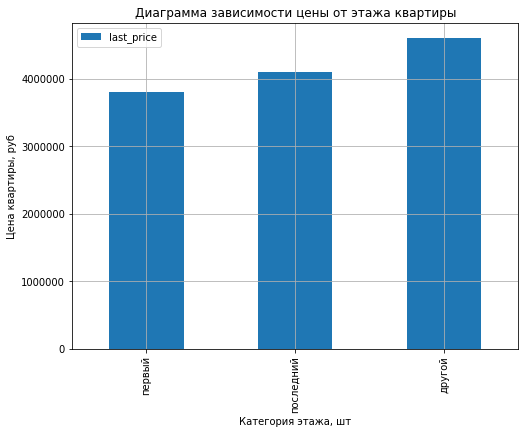

In [426]:
(good_days_data
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .sort_values('last_price')
    .plot(kind='bar', grid=True, figsize=(8,6))
)
plt.xlabel('Категория этажа, шт')
plt.ylabel('Цена квартиры, руб')
plt.title('Диаграмма зависимости цены от этажа квартиры')

Text(0.5, 1.0, 'Диаграмма зависимости цены от этажа квартиры')

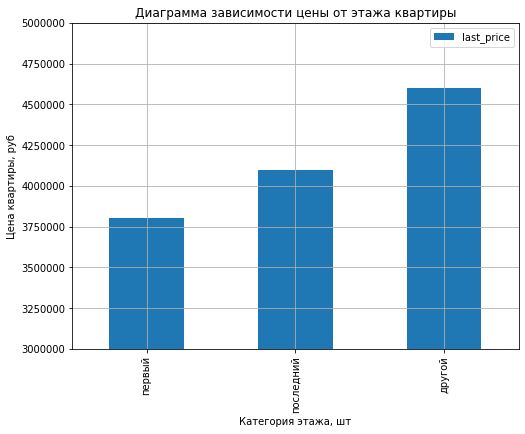

In [427]:
(good_days_data
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .sort_values('last_price')
    .plot(kind='bar', grid=True, figsize=(8,6), ylim=(3000000, 5000000))
)
plt.xlabel('Категория этажа, шт')
plt.ylabel('Цена квартиры, руб')
plt.title('Диаграмма зависимости цены от этажа квартиры')

Исходя из графика, за первый этаж готовы платить меньше, чем за последний на 300000 рублей, а за последний меньше, чем за любой другой на 500000 рублей.

Проверим наличие связи между ценой и удаленностью от центра.

In [428]:
good_days_data['last_price'].corr(good_days_data['cityCenters_nearest'])

0.05608933285528681

Корреляция не показала начичие связи между параметрами, так как либо ее нет, либо она не линейная.

Text(0, 0.5, 'Цена квартиры, млрд. руб')

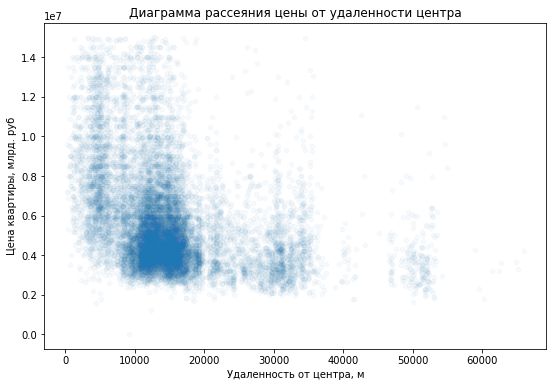

In [429]:
(good_days_data
 .query('cityCenters_nearest > 0') # "0" означает, что в данных эта ячейка была пуста
 .plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.03, title='Диаграмма рассеяния цены от удаленности центра', figsize=(9, 6))
)
plt.xlabel('Удаленность от центра, м')
plt.ylabel('Цена квартиры, млрд. руб')

Text(0.5, 1.0, 'Диаграмма рассеяния цены от удаленности от центра')

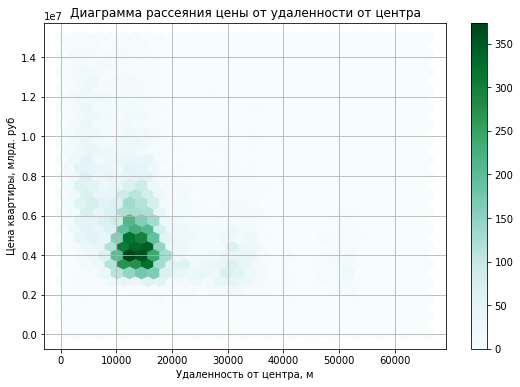

In [430]:
(good_days_data
 .query('cityCenters_nearest > 0')
 .plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=30, figsize=(9, 6), sharex=False, grid=True)
)
plt.xlabel('Удаленность от центра, м')
plt.ylabel('Цена квартиры, млрд. руб')
plt.title('Диаграмма рассеяния цены от удаленности от центра')

Наличие хоть какой-то связи можно наблюдать только для цены от 3 до 6 миллионов и для удаленности от 10 до 18 километров. Провеерим есть ли хоть какая-то связь в цене за метр.

In [431]:
good_days_data['meter_price'].corr(good_days_data['cityCenters_nearest'])

0.156760687755901

Корреляция уже лучше, чем была, но все еще слишком мало, чтобы говорить о связи.

Text(0.5, 1.0, 'Диаграмма рассеяния цены квадратного от удаленности от центра')

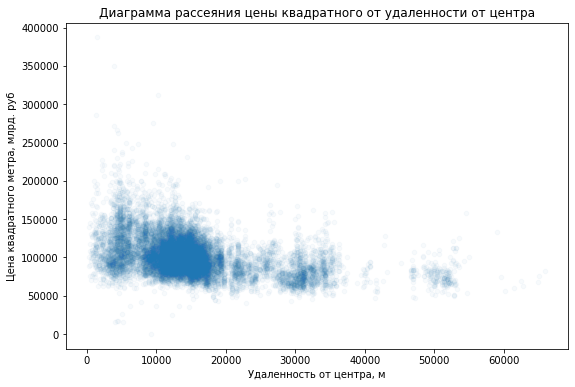

In [432]:
(good_days_data
 .query('cityCenters_nearest > 0')
 .plot(x='cityCenters_nearest', y='meter_price', kind='scatter', alpha=0.03, figsize=(9, 6))
)
plt.xlabel('Удаленность от центра, м')
plt.ylabel('Цена квадратного метра, млрд. руб')
plt.title('Диаграмма рассеяния цены квадратного от удаленности от центра')

Гистограмма тоже не упрощает задачу и дает точно такое же по форме ядро, как и прошлая.

Проверим наличие связи цени и удаленности от центра для каждого отдельного населенного пункта.

In [433]:
good_days_data.query('cityCenters_nearest > 0')['locality_name'].value_counts()

Санкт-Петербург    12371
Шушары               400
Колпино              305
Парголово            297
Пушкин               284
Петергоф             172
Сестрорецк           158
Красное              151
Ломоносов            112
Кронштадт             83
Металлострой          59
Стрельна              37
Павловск              30
Зеленогорск           20
Понтонный             17
Сапёрный               5
Песочный               4
Лисий                  3
Молодёжное             3
Репино                 3
Александровская        2
Усть-Ижора             2
Левашово               1
Белоостров             1
Name: locality_name, dtype: int64

Больше всего данных по Санкт-Петербургу, поэтому проверим на нем, есть ли связь между нашими парамметрами.

Text(0.5, 1.0, 'Диаграмма рассеяния цены от удаленности от центра')

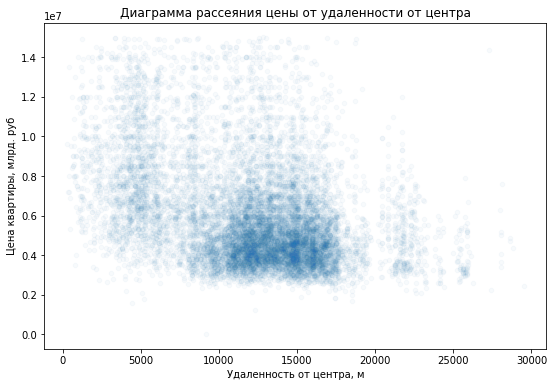

In [434]:
(good_days_data
    .query('cityCenters_nearest > 0 and locality_name == "Санкт-Петербург"')
    .plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.03, figsize=(9, 6))
)
plt.xlabel('Удаленность от центра, м')
plt.ylabel('Цена квартиры, млрд. руб')
plt.title('Диаграмма рассеяния цены от удаленности от центра')

Ничего нового, явной связи не обнаружено, значит скорее всего она нелинейная.

Изучим связь цены и датой размещения. Начнем с дня недели.

Text(0.5, 1.0, 'Гистограмма по дням размещения объявлений')

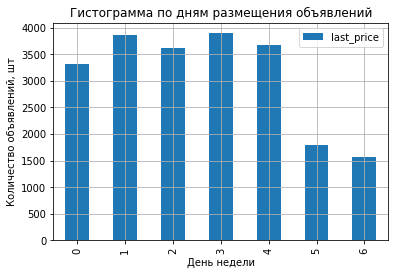

In [435]:
good_data['weekday'] = good_data['first_day_exposition'].dt.weekday
(good_data
    .pivot_table(index='weekday', values='last_price', aggfunc='count')
    .plot(y='last_price', kind='bar', grid=True)
)
plt.xlabel('День недели')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма по дням размещения объявлений')

Для каждого дня недели представленно достаточно объявлений, поэтому данные можно будет считать показательными.

Text(0.5, 1.0, 'График зависимости цены от дня размещения объявления')

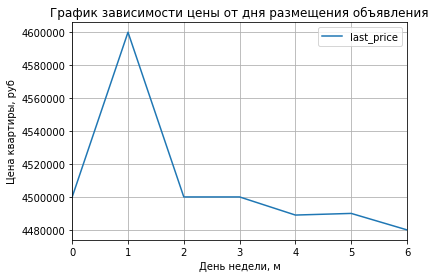

In [436]:
(good_data
    .pivot_table(index='weekday', values='last_price', aggfunc='median')
    .plot(grid=True)
)
plt.xlabel('День недели, м')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости цены от дня размещения объявления')

Text(0.5, 1.0, 'Диаграмма зависимости цены от дня размещения объявления')

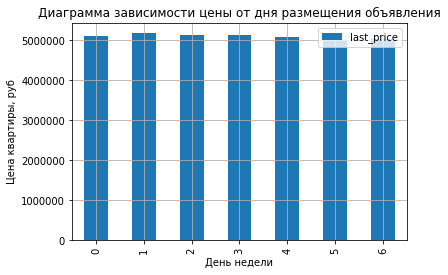

In [437]:
(good_data
    .pivot_table(index='weekday', values='last_price')
    .plot(kind='bar', grid=True)
)
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, руб')
plt.title('Диаграмма зависимости цены от дня размещения объявления')

Обнаружены несущественные колебания цены, так объявления размещенные во вторник оказываются дороже на 100000 рублей всех остальных. Скорее всего это погрешность собранных данных, поэтому связи нет. Проверим месяц.

Text(0.5, 1.0, 'Гистограмма по месяцам размещения объявлений')

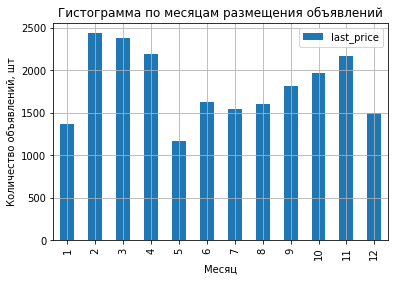

In [438]:
good_data['month'] = good_data['first_day_exposition'].dt.month
(good_data
    .pivot_table(index='month', values='last_price', aggfunc='count')
    .plot(y='last_price', kind='bar', grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма по месяцам размещения объявлений')

Для каждого месяца представленно достаточно объявлений, поэтому данные можно будет считать показательными.

Text(0.5, 1.0, 'График зависимости цены от месяца размещения объявления')

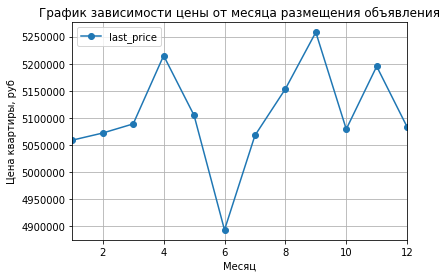

In [439]:
(good_data
    .pivot_table(index='month', values='last_price')
    .plot(style='o-', grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости цены от месяца размещения объявления')

По графику можно судить, что ближе к лету цена на жилье существенно снижается и доходит до минимума в июне, а к августу возвращается к стандартным значениям.

Проверим год.

Text(0.5, 1.0, 'Гистограмма по годам размещения объявлений')

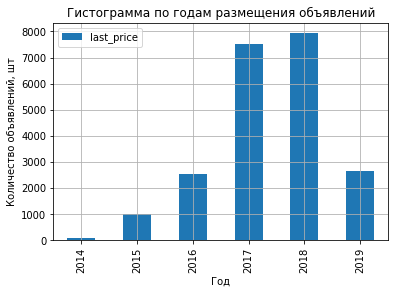

In [440]:
good_data['year'] = good_data['first_day_exposition'].dt.year
(good_data
    .pivot_table(index='year', values='last_price', aggfunc='count')
    .plot(y='last_price', kind='bar', grid=True)
)
plt.xlabel('Год')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма по годам размещения объявлений')

Для некоторых годов представленно мало данных, построим диаграмму размаха, чтобы точно понять, по каким данным брать срез.

Text(0.5, 1.0, 'Диаграмма размаха по годам размещения объявлений')

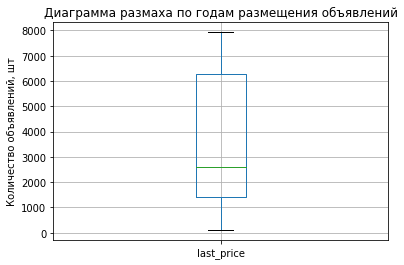

In [441]:
(good_data
    .pivot_table(index='year', values='last_price', aggfunc='count')
    .boxplot('last_price')
)

plt.ylabel('Количество объявлений, шт')
plt.title('Диаграмма размаха по годам размещения объявлений')

Все года, где меньше 1500 объявлений, можно считать не показательными, а именно 2014 и 2015. Остальные данные в силу большого количества объявлений будут давать корректные результаты.

Text(0.5, 1.0, 'График зависимости цены от года размещения объявления')

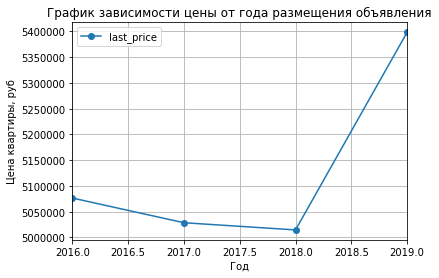

In [442]:
(good_data.query('year > 2015')
    .pivot_table(index='year', values='last_price')
    .plot(style='o-', grid=True)
)
plt.xlabel('Год')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости цены от года размещения объявления')

Судя по графику цена на квартиры не значительно падала с 2016 до 2018 года и в 2019 наблюдался рост.

### Вывод

Были изучение зависимости цены от площади, числа комнат, этажа, удаленности от центра и от даты размещения.

Как оказалось цена напрямую связана как с площадью квартиры, так и числом комнат.

Цена оказалась связана с номером этажа, а именно первый - этаж с самыми дешевыми квартирами, последний - на втором месте, далее по цене идут все оставшиеся этажи. Но несмотря на то, что связь есть, она не пропорциональна номеру этажа.

При анализе не было выявлено явной линейной связи между удаленностью от центра и ценой. В дальнейшем необходимо определить как эти 2 параметра связаны.

Цена никак не зависит от дня недели, в который было создано объявление. Но с месяцем и годом связь у цены есть. Самая малая цена наблюдалась в июне, а в сентябре - максимум. По гистограмме года, можно судить, что стоимость на жилье с до 2018 падала, а в 2019 начала свой рост.

### Изучение 10  населенных пунктов с наибольшим числом объявлений. <a id='section10'></a>

In [443]:
data_city_top_counts = (good_data
                        .groupby('locality_name')['locality_name']
                        .count()
                        .sort_values(ascending=False)
                        .head(10)
                       )
data_city_top_counts

locality_name
Санкт-Петербург    14045
Мурино               557
Кудрово              448
Шушары               434
Всеволожск           386
Пушкин               338
Колпино              336
Парголово            322
Гатчина              305
Выборг               226
Name: locality_name, dtype: int64

Подсчитаем среднюю цену квадратного метра в этих начеленных пунктах.

In [444]:
(good_data
    .query('locality_name in @data_city_top_counts.index')
    .pivot_table(index='locality_name', values='meter_price')
    .sort_values('meter_price', ascending=False)
)


,meter_price
locality_name,
Санкт-Петербург,106876.332466
Пушкин,100954.551864
Кудрово,95083.876696
Парголово,90448.423416
Мурино,85501.529623
Шушары,78254.497696
Колпино,75352.475595
Гатчина,68811.372590
Всеволожск,67118.542850


Составим круговую диаграмму.

### Вывод

Исходя из полученых данных, самые дорогие квартиры находятся в городах Санкт-Петербург и Пушкин, в них стоимость квадратного метра больше 100 тысяч рублей. Самые дешевые квартиры можно найти в Выборге, Всеволожске и Гатчине. Так за квадратный метр в среднем платят меньше 70 тысяч, а в Выброрге и вовсе меньше 60.

### Определить, где начинается центр Санкт-Петербурга. <a id='section11'></a>

Создадим срез по Санкт-Петербургу и изавимся от нулевых растояний до центра, так как 0 это маркер отсутствия значения в оригинальной таблице.

In [446]:
good_data_spb = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != 0')
good_data_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14001 entries, 0 to 23697
Data columns (total 29 columns):
total_images            14001 non-null uint8
last_price              14001 non-null int64
total_area              14001 non-null float64
first_day_exposition    14001 non-null datetime64[ns]
rooms                   14001 non-null uint8
ceiling_height          14001 non-null float16
floors_total            14001 non-null uint8
living_area             14001 non-null float64
floor                   14001 non-null uint8
is_apartment            14001 non-null bool
studio                  14001 non-null bool
open_plan               14001 non-null bool
kitchen_area            14001 non-null float64
balcony                 14001 non-null uint8
locality_name           14001 non-null object
airports_nearest        14001 non-null int32
cityCenters_nearest     14001 non-null int32
parks_around3000        14001 non-null uint8
parks_nearest           14001 non-null uint16
ponds_around3000    

In [447]:
good_data_spb[['last_price', 'cityCenters_nearest']].head()

,last_price,cityCenters_nearest
0,13000000,16028
2,5196000,13933
4,10000000,8098
7,7915000,11634
9,5400000,15008


Создадим столбец с расстоянием до центра в километрах и выведем график, на котором каждому километру будет соответствовать средняя цена квартир на нем.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'График зависимости цены от удаленности от центра')

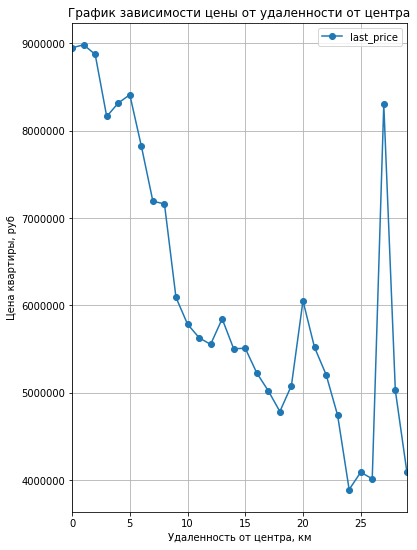

In [448]:
good_data_spb['dist_to_center_km'] = round(good_data_spb['cityCenters_nearest'] / 1000)

(good_data_spb
     .pivot_table(index='dist_to_center_km', values='last_price')
     .plot(style='o-', grid=True, figsize=(6, 9))
)
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости цены от удаленности от центра')

График получился ступенчатым с большим всплеском в районе 27 километров, это может быть связано с тем, что на этом расстоянии от центра продается мало квартир и у нас недостаточно данных, чтобы корректно использовать этот километраж. Получим сводную таблицу, по которой проверим так ли это.

Text(0.5, 1.0, 'График зависимости цены от удаленности от центра')

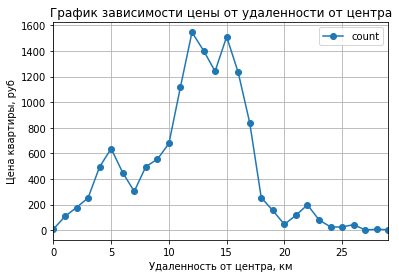

In [449]:
spb_kms = good_data_spb.pivot_table(index='dist_to_center_km', values='last_price', aggfunc=['mean', 'count'])
spb_kms.columns = ['mean', 'count']
spb_kms.plot(style='o-', y='count', grid=True)
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости цены от удаленности от центра')

Text(0.5, 1.0, 'График зависимости цены от удаленности от центра')

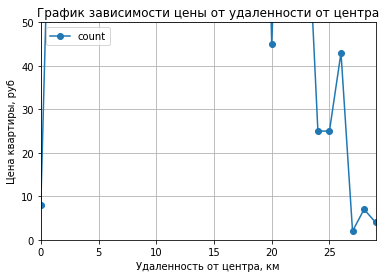

In [450]:
spb_kms.plot(style='o-', y='count', grid=True, ylim=(0, 50))
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости цены от удаленности от центра')

Удалим километры, значений на который меньше 50 и получим график средней цены на километр.

Text(0.5, 1.0, 'График зависимости цены от удаленности от центра')

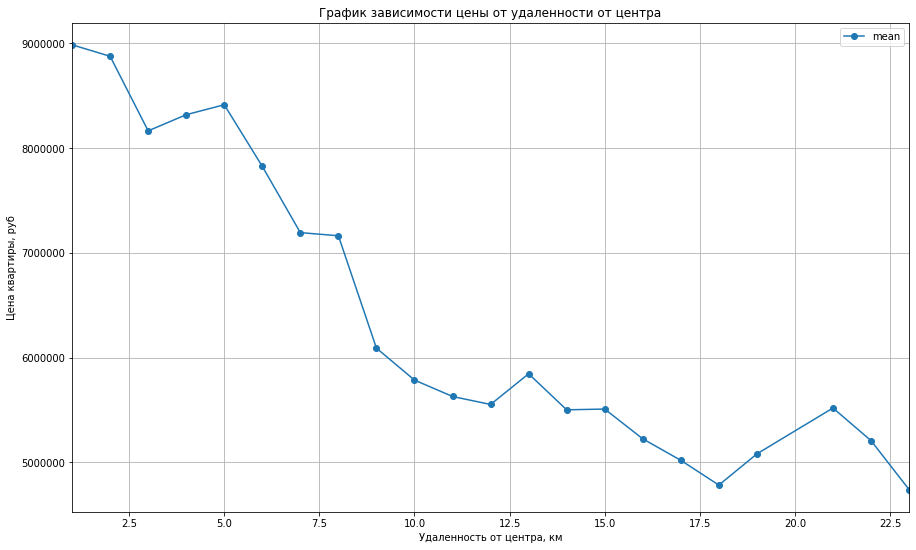

In [451]:
spb_kms.query('count > 50').plot(style='o-', y='mean', grid=True, figsize=(15, 9))
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости цены от удаленности от центра')

### Вывод

По графику видно, что цена между 8 и 9 километрами резко растет. То есть можно считать, что граница центральной зоны находится на 8 километре.

### Изучение квартир в центре Санкт-Петербурга. <a id='section12'></a>

Выделим квартиры в центре и изучим такие параметры как площадь, высота потолков, цена, число комнат.

Начнем с площади.

count    14001.000000
mean        56.889969
std         21.751267
min         20.100000
25%         41.000000
50%         52.000000
75%         68.000000
max        190.000000
Name: total_area, dtype: float64
count    2925.000000
mean       69.391675
std        26.028354
min        20.300000
25%        48.800000
50%        66.000000
75%        85.000000
max       190.000000
Name: total_area, dtype: float64


Text(0.5, 1.0, 'Гистограмма площади квартиры')

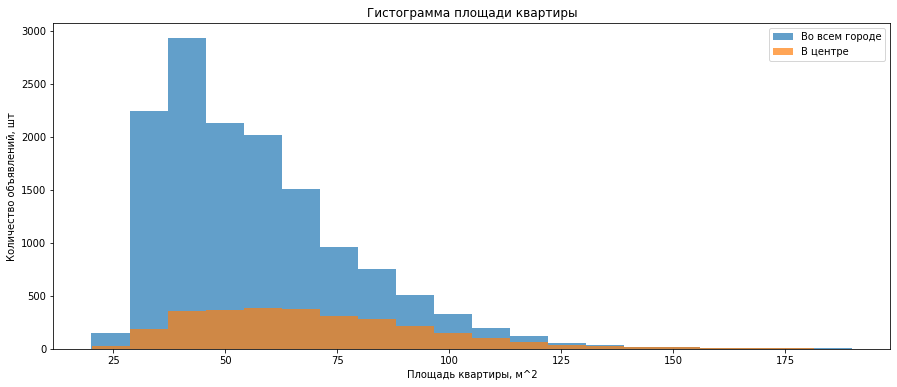

In [452]:
spb_center = good_data_spb.query('dist_to_center_km <= 8')
print(good_data_spb['total_area'].describe())
print(spb_center['total_area'].describe())
ax = good_data_spb.plot(kind='hist', y='total_area', alpha=0.7, bins=20, label='Во всем городе')
spb_center.plot(kind='hist', y='total_area', alpha=0.7, ax=ax, bins=20, figsize=(15, 6), label='В центре')
plt.xlabel('Площадь квартиры, м^2')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма площади квартиры')

In [453]:
print('На сколько процентов различаются медианы во всем городе и центре: {:.2%}'. format(1 - good_data_spb['total_area'].median() / spb_center['total_area'].median()))

На сколько процентов различаются медианы во всем городе и центре: 21.21%


Судя по описанию и гистограмме общей площади квартир в Санкт-Петербурге и во всем городе, медианное значение общей площади квартиры в центре меньше на 21.21%, чем в в центральной части, а число квартир с большой площадью (от 125 с больше) стремится к нулю и там, и там. Гистограмма имеет вид распределения Пуассона, что говорит о корректности представленных данных.

Изучим высоту потолков.

count    2925.000000
mean        2.824219
std         0.241943
min         2.449219
25%         2.650391
50%         2.699219
75%         3.000000
max         3.490234
Name: ceiling_height, dtype: float64


Text(0.5, 1.0, 'Гистограмма для высоты потолков')

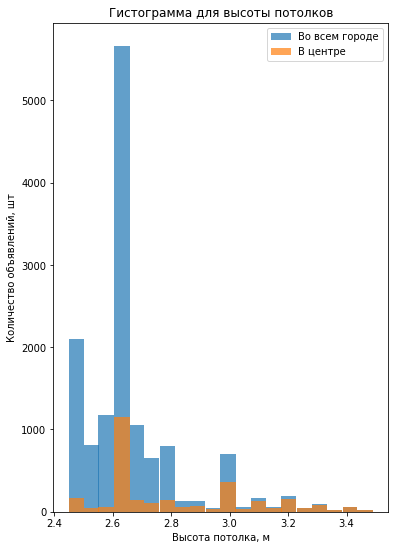

In [454]:
print(spb_center['ceiling_height'].describe())
#spb_center.hist('ceiling_height', bins=20)
ax = good_data_spb.plot(kind='hist', y='ceiling_height', alpha=0.7, bins=20, label='Во всем городе')
spb_center.plot(kind='hist', y='ceiling_height', alpha=0.7, ax=ax, bins=20, figsize=(6, 9), label='В центре')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма для высоты потолков')

Большая часть потолков на графике имеет высоту 2.65 метра, что объясняется тем, что пропуски в этом столбце заполнялись медианой. Присутствует всплеск на 3 метрах, как и на данных по всем населенным пунктам. Он появился из-за того, что при строительстве проще закладывать высоту потолков ровным числом метров. Высоких потолков (от 3 метров) больше в центре, чем в других частях города, и можно судить, что почти все такие квартиры находятся в центре.

Изучим цену квартиры.

count    1.400100e+04
mean     6.023246e+06
std      2.598622e+06
min      1.219000e+04
25%      4.135000e+06
50%      5.250000e+06
75%      7.200000e+06
max      1.500000e+07
Name: last_price, dtype: float64
count    2.925000e+03
mean     7.995930e+06
std      2.819501e+06
min      1.600000e+06
25%      5.850000e+06
50%      7.600000e+06
75%      9.900000e+06
max      1.499000e+07
Name: last_price, dtype: float64


Text(0.5, 1.0, 'Гистограмма стоимости квартиры')

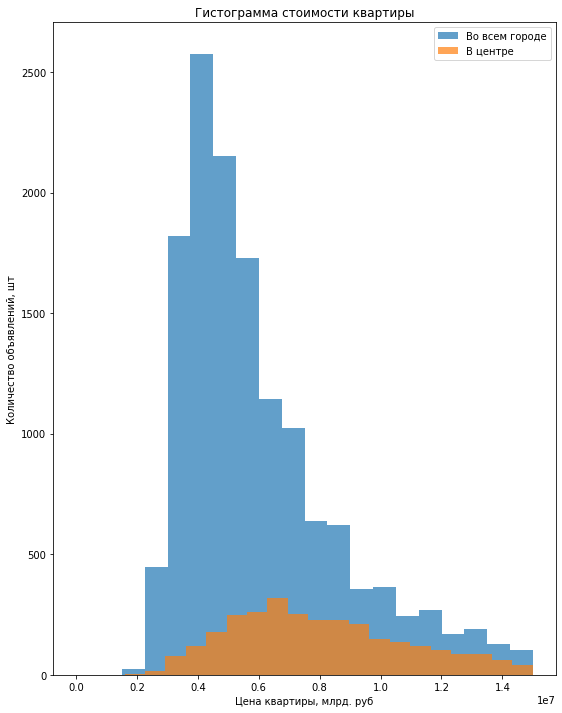

In [455]:
print(good_data_spb['last_price'].describe())
print(spb_center['last_price'].describe())

ax = good_data_spb.plot(kind='hist', y='last_price', alpha=0.7, bins=20, label='Во всем городе')
spb_center.plot(kind='hist', y='last_price', alpha=0.7, ax=ax, bins=20, figsize=(9, 12), label='В центре')
plt.xlabel('Цена квартиры, млрд. руб')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма стоимости квартиры')

In [456]:
print('На сколько процентов различаются медианы во всем городе и центре: {:.2%}'. format(1 - good_data_spb['last_price'].median() / spb_center['last_price'].median()))

На сколько процентов различаются медианы во всем городе и центре: 30.92%


Цена квартиры в центре Санкт-Петербурга на гистограмме представляет гаспределение Пуассона. Медианное значение цены квартиры во всем городе почти на 31% ниже, чем в центре. Число квартир с высокой стоимостью (от 10 милллионов) в центре судя по графику составляет около половины от таких квартир по городу в целом.

Изучим число комнат.

count    14001.000000
mean         2.032069
std          0.931228
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64
count    2925.000000
mean        2.393846
std         1.018685
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


Text(0.5, 1.0, 'Гистограмма количества комнат')

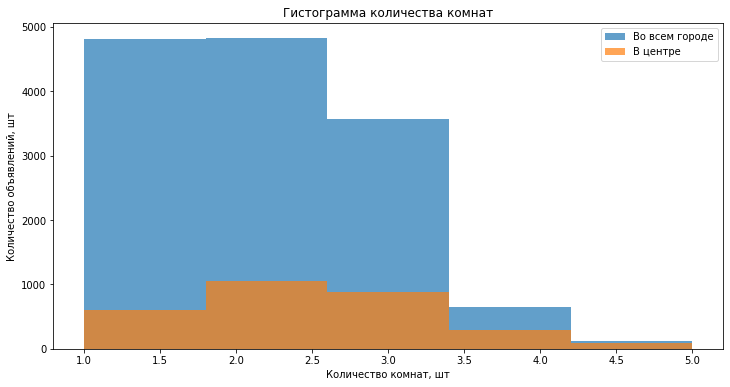

In [457]:
print(good_data_spb['rooms'].describe())
print(spb_center['rooms'].describe())

ax = good_data_spb.plot(kind='hist', y='rooms', alpha=0.7, bins=5, label='Во всем городе')
spb_center.plot(kind='hist', y='rooms', alpha=0.7, ax=ax, bins=5, figsize=(12, 6), title='Число комнат', label='В центре')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма количества комнат')

По данной гистограмме можно сказать лишь то, что почти все квартиры с 5 комнатами находятся в центре, но для остальных квартир необходимо использовать другие инструменты. Узнаем какую часть составляют квартиры с разным числом комнат от всех квартир во всем городе и в центре.

Начнем с города в целом.

In [458]:
spb_rooms_pie = good_data_spb.pivot_table(index='rooms', values='last_price', aggfunc='count')
spb_rooms_pie.columns = ['ratio']
total = sum(spb_rooms_pie['ratio'])
spb_rooms_pie['ratio'] = round(spb_rooms_pie['ratio'] / total, 3)
print(spb_rooms_pie)

       ratio
rooms       
1      0.344
2      0.345
3      0.255
4      0.047
5      0.009


Далее проделаем тоже самое с центром и сравним полученные значения на графиках.

In [459]:
spb_center_rooms_pie = spb_center.pivot_table(index='rooms', values='last_price', aggfunc='count')
spb_center_rooms_pie.columns = ['ratio']
total = sum(spb_center_rooms_pie['ratio'])
spb_center_rooms_pie['ratio'] = round(spb_center_rooms_pie['ratio'] / total, 3)
print(spb_center_rooms_pie)

       ratio
rooms       
1      0.204
2      0.362
3      0.301
4      0.102
5      0.031


Text(0.5, 1.0, 'Гистограмма количества комнат')

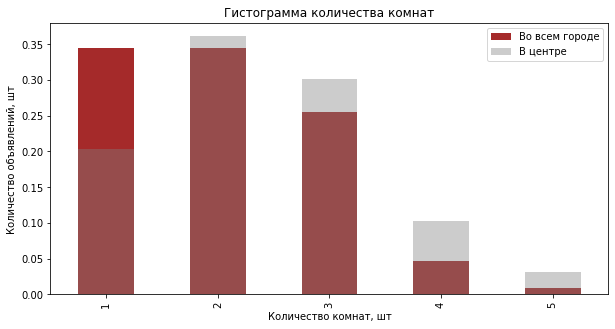

In [460]:
ax = spb_rooms_pie.plot(kind='bar', y='ratio', alpha=1, label='Во всем городе', figsize=(10, 5), color='brown')
spb_center_rooms_pie.plot(kind='bar', y='ratio', alpha=0.4, figsize=(10, 5), label='В центре', ax=ax, color='grey')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма количества комнат')

По графику видно, что в центре доля квартир с 2 комнатами и больше выше, чем во всем городе в целом. В центре наблюдается значительно меньше однокомнатных квартир, а доля двухкомнатных примерно такая же как со всем Санкт-Петербурге, а доля четырех- и пятикомнатных квартир в центре гораздо выше.

<div class="alert alert-block alert-success">
<b>Success:</b> Культурное наследие)</div>

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Начнем с числа комнат.

Text(0.5, 1.0, 'Диаграмма зависимости стоимости квартиры от количества комнат')

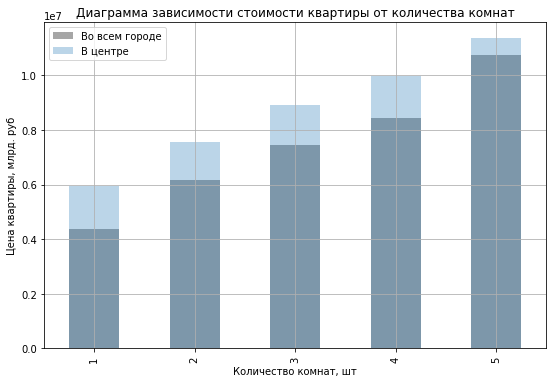

In [462]:
ax = (good_data_spb
 .pivot_table(index='rooms', values='last_price')
 .plot(kind='bar', y='last_price', alpha=0.7, grid=True, figsize=(9, 6), label='Во всем городе', color='grey')
)
(spb_center
 .pivot_table(index='rooms', values='last_price')
 .plot(kind='bar', y='last_price', alpha=0.3, grid=True, figsize=(9, 6), ax=ax, title='Цена от числа комнат', label='В центре')
)
plt.xlabel('Количество комнат, шт')
plt.ylabel('Цена квартиры, млрд. руб')
plt.title('Диаграмма зависимости стоимости квартиры от количества комнат')

С увеличением числа комнат растет и цена квартиры. Это справедливо как для центра, так и для всего города в целом. На данной столбчатой диаграмме можно заметить, что для пятикомнатных квартир цена в центре и в городе в целом не сильно различается, это связано с тем, что большинство таких квартир находятся в центре и за счет количественного перевеса смещают среднее значение всего города ближе к себе.

Проверим как влияет на стоимость этаж.

Text(0.5, 1.0, 'Диаграмма зависимости стоимости квартиры от этажа размещения')

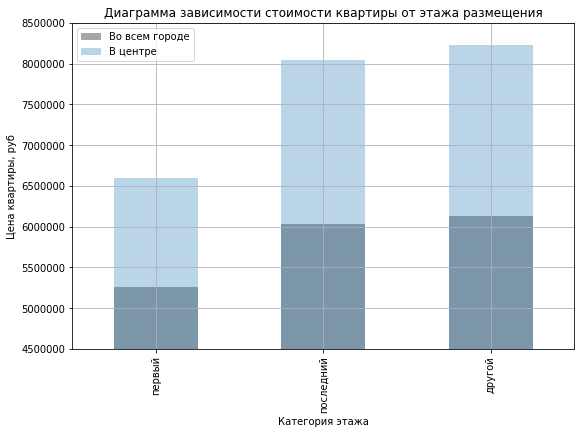

In [463]:
ax = (good_data_spb
 .pivot_table(index='floor_category', values='last_price')
 .sort_values('last_price')
 .plot(kind='bar', y='last_price', alpha=0.7, grid=True, figsize=(9, 6), label='Во всем городе', color='grey')
)
(spb_center
 .pivot_table(index='floor_category', values='last_price')
 .sort_values('last_price')
 .plot(kind='bar', y='last_price', alpha=0.3, grid=True, figsize=(9, 6), ax=ax, title='Цена от номера этажа', label='В центре', ylim=(4500000, 8500000))
)
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры, руб')
plt.title('Диаграмма зависимости стоимости квартиры от этажа размещения')

Для города в целом и центра в частности справедливо, что на первом этаже находятся самые дешевые квартиры, потом идут квартиры на последнем этаже и немногим выше стоят все остальные.

Влияние на стоимость удаленности от центра мы уже проверили проверили. При движении от окраин к центру цена медленно растет на 8 километре (начало центральной зоны) рост стоимотри увеличивается.

Изучим связь цены и даты размещения по дням недели, месяцам и годам.

Text(0.5, 1.0, 'Гистограмма по дням размещения объявлений')

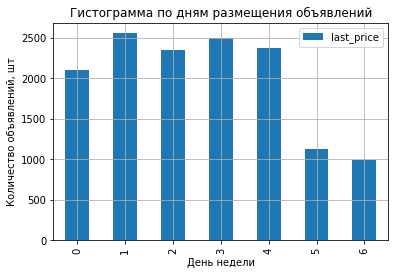

In [467]:
(good_data_spb
    .pivot_table(index='weekday', values='last_price', aggfunc='count')
    .plot(y='last_price', kind='bar', grid=True)
)
plt.xlabel('День недели')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма по дням размещения объявлений')

Данных достаточно для каждого дня недели.

Text(0.5, 1.0, 'График зависимости стоимости квартиры от дня размещения объявления')

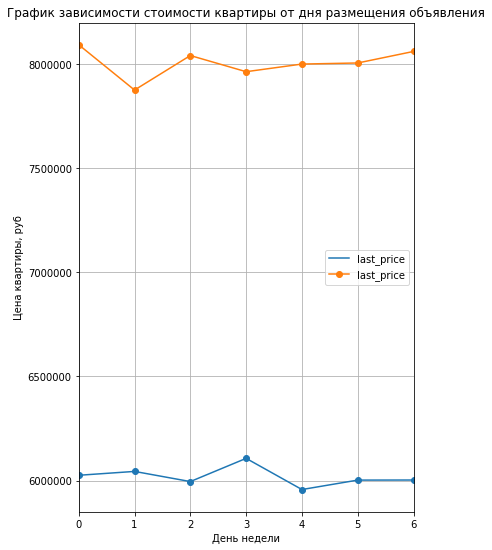

In [464]:
ax = (good_data_spb
    .pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', label='Во всем городе')
)
(spb_center
    .pivot_table(index='weekday', values='last_price')
    .plot(grid=True, ax=ax, figsize=(6, 9), style='o-', label='В центре')
)
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости стоимости квартиры от дня размещения объявления')

Обнаружены несущественные колебания цены, cкорее всего это погрешность собранных данных, поэтому связи нет. Проверим месяц.

Text(0.5, 1.0, 'Гистограмма по месяцам размещения объявлений')

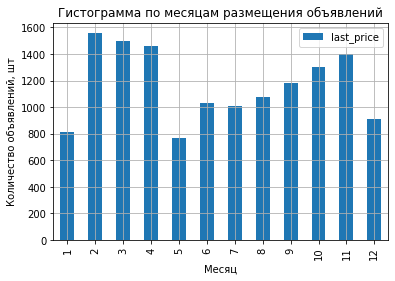

In [468]:
(good_data_spb
    .pivot_table(index='month', values='last_price', aggfunc='count')
    .plot(y='last_price', kind='bar', grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма по месяцам размещения объявлений')

Данных достаточно для каждого месяца.

Text(0.5, 1.0, 'График зависимости стоимости квартиры от месяца размещения объявления')

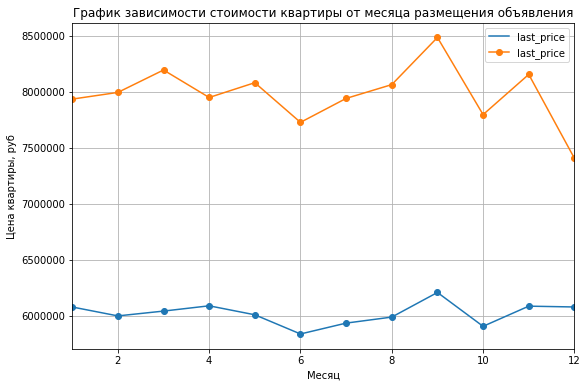

In [465]:
ax = (good_data_spb
    .pivot_table(index='month', values='last_price')
    .plot(style='o-', grid=True, label='Во всем городе')
)
(spb_center
    .pivot_table(index='month', values='last_price')
    .plot(grid=True, ax=ax, figsize=(9, 6), style='o-', label='В центре')
)
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости стоимости квартиры от месяца размещения объявления')

По графику можно судить, что ближе к лету цена на жилье существенно снижается и доходит до минимума в июне, а к августу возвращается к стандартным значениям, а в сентябре принимает максимальное свое значение. Значения цены в центре от месяца к месяцу колеблятся сильнее, чем во всем Санкт-Петербурге, из-за того, что во всем городе куда больше объявлений о продаже квартир и из-за количества результирующий график сглаживается. Несмотря на это характер распределения значений в обоих случаях схож. Как исключения выделяляются апрель(4) и декабрь(12), в них изменение цены в центре имеет противоположную динамику относительно города в целом.

Проверим год.

Text(0.5, 1.0, 'Гистограмма по годам размещения объявлений')

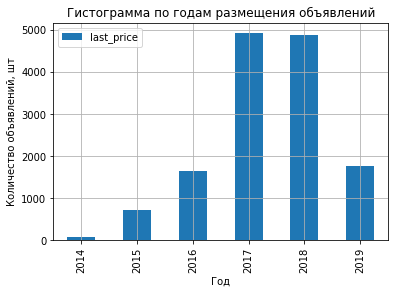

In [469]:
(good_data_spb
    .pivot_table(index='year', values='last_price', aggfunc='count')
    .plot(y='last_price', kind='bar', grid=True)
)
plt.xlabel('Год')
plt.ylabel('Количество объявлений, шт')
plt.title('Гистограмма по годам размещения объявлений')

Text(0.5, 1.0, 'Диаграмма размаха по дням размещения объявлений')

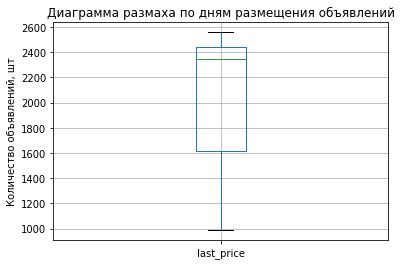

In [470]:
(good_data_spb
    .pivot_table(index='weekday', values='last_price', aggfunc='count')
    .boxplot('last_price')
)
plt.ylabel('Количество объявлений, шт')
plt.title('Диаграмма размаха по дням размещения объявлений')

Из-за присутствия годов, в которых слишком мало объявлений, принято решение взять срез без годов с числом объявлений меньше 1600 (2014 и 2015)

Text(0.5, 1.0, 'График зависимости стоимости квартиры от года размещения объявления')

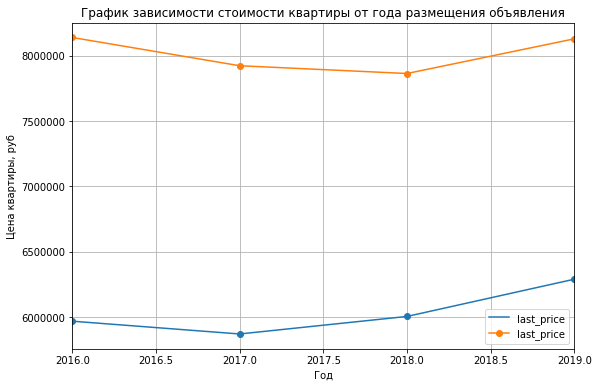

In [471]:
ax = (good_data_spb
    .query('year > 2015')
    .pivot_table(index='year', values='last_price')
    .plot(style='o-', grid=True, label='Во всем городе')
)
(spb_center
    .query('year > 2015')
    .pivot_table(index='year', values='last_price')
    .plot(grid=True, ax=ax, figsize=(9, 6), style='o-', label='В центре')
)
plt.xlabel('Год')
plt.ylabel('Цена квартиры, руб')
plt.title('График зависимости стоимости квартиры от года размещения объявления')

Можно заметить, что с 2014 года цена падала, причем в центре стоимость квартир оказалась более устойчивой нежели во всем городе целиком. Это демонстрируется резним падением для всего города в период 2014-2015. Рост же в центральной зоне наметился лишь в 2018, хотя в городе рост начался на год раньше в 2017.

### Вывод

По гистограммам общей площади и цены квартир, можно судить, что медиана у этих параметров смещается вправо от нуля, что говорит, об увеличении медианной площади квартир в центре и их цены. Так же по этим графикам видно, что большинство квартир с высокой ценой и большой площадью находятся именно в центре. Это видно по сливающимся хвостам этих графиков.

График для высоты потолков говорит о том, что значения высоты потолков везде распределены в примерно равном объеме, разве что почти все квартиры, имеющие высокие потолки, находятся в центре.

По гистограмме долей квартир с разным числом комнат от всех квартир, видно, что в центре доля однокомнатных квартир в 2 раза меньше, чем во всем остальном городе, но доли квартир с другим числом комнат растет, особенно доли 4х- и 5тикомнатных квартир (почти все пятикомнатные квартиры располагаются в центре).

Влияние на стоймость квартиры числа комнат можно было проследить на соответствующем графике. Чем больше комнат, тем больше цена, но связь не прямая, ведь если бы это было так, то стоимость двухкомнатной картиры была бы в 2 раза больше однокомнатной, а это не так. Это справедливо как для центра, так и для всего города в целом.

Для этажа расположения квартиры выводы так же справедливы как для центра, так и для всего города в целом. На первом цена самая дешевая, на последнем на втором месте, а следом с небольшим отрывом идут все оставшиеся этажи, можно утверждать, что цена различается лишь для первого этажа и всех остальных.

Никакой связи между ценой и днем размещения выявлено не было.

Связь между ценой и месяцем размещения есть и из нее следует, что ближе к лету цена на жилье существенно снижается и доходит до минимума в июне, а к августу возвращается к стандартным значениям, а в сентябре принимает максимальное свое значение. Значения цены в центре от месяца к месяцу колеблятся сильнее, чем во всем Санкт-Петербурге, из-за того, что во всем городе куда больше объявлений о продаже квартир и из-за количества результирующий график сглаживается. Несмотря на это характер распределения значений в обоих случаях схож. Как исключения выделяляются апрель(4) и декабрь(12), в них изменение цены в центре имеет противоположную динамику относительно города в целом.

Связь между ценой и годом размещения есть и из нее можно заметить, что цена незначительно падала до 2017 в городе и 2018 в центре.

## Шаг 5. Общий вывод <a id='section13'></a>

В проекте "Исследование объявлений о продаже квартир" были проведены следующие мероприятия: определены и удалены/заполнены пропуски, удалены дубликаты, изменен тип данных некоторых столбцов, убраны редкие и выбивающиеся значения и выполнен исследовательский анализ данных для всех, населенных пунктов, Санкт-Петербурга в целом и только его центра. После всей проделанной работы можно наверняка выделить факторы, которое влияют на стоимость квартиры. На этапе ответов на вопросы выяснилось, что на цену квартиры влияет ее площадь и число комнат. Из этажей, на которых может быть расположена квартира, только первый существенно снижает цену, остальные наподятся примерно на одном уровне цены. В центральной зоне города цена гораздо выше, чем за ее пределами, но в исследовании это было доказано только для Санкт-Петербурга, потому что цена и центральные зоны в различных городах сильно варьируются и из-за этого для каждого города, необходимо свое исследование зависимости цены квартиры и ее удаленности от центра. Изучив дату размещения объявления, на цену влияют месяц и год пебликации, а день недели никакого влияния не оказывает. Также мы выяснили, что в основном квартиры продаются за 93 дня, а аномально долгим размещением можно считать объявления, закрывающиеся через 418 дня, и аномально быстрым - 44 дня. Центральной зоной Санкт-Петербурга можно считать все, что удалено от центра не более, чем на 8 километров.